In [4]:
import pandas as pd

df = pd.read_excel('M0.5D0.001E0.99A0.99_300x300_first_cluster_2.xlsx')

print(df['num iterations'].unique())

[10199999]


In [ ]:
import pandas as pd
import multiprocessing as mp
from ParticleSystem import ParticleSystem

# Constants
WORLD_WIDTH = 300
WORLD_HEIGHT = 300
DELTA = 0.001
MU = 0.5
EPSILON = 0.99
ALPHA = 0.99
DOT_SIZE = 2
MIDDLE_CLUSTER_SIZE = -1
NUM_ITERATIONS = 10**18  # Large number instead of float('inf')
INIT_REFRESH_RATE = 10
INIT_PAUSED_STATUS = False

# Function to run a single simulation
def run_simulation(i):
    world = ParticleSystem(
        WORLD_WIDTH, WORLD_HEIGHT, DELTA, MU, EPSILON, ALPHA, DOT_SIZE,
        MIDDLE_CLUSTER_SIZE, NUM_ITERATIONS, INIT_REFRESH_RATE, INIT_PAUSED_STATUS
    )

    num_iterations_it_took = world.SIMPLE_run_simulation_get_iteration_of_first_single_cluster(
        refresh_rate=280, check_rate=60000, init_render_status=False, first_check=200000
    )

    print(f'Finished iteration: {i}')
    return world.id, num_iterations_it_took

# Run simulations in parallel
if __name__ == "__main__":
    with mp.Pool(mp.cpu_count()) as pool:
        results = pool.map(run_simulation, range(200))

    # Convert results to DataFrame
    df = pd.DataFrame(results, columns=["Run ID", "num iterations"])

    # Save results
    df.to_excel(f'M{MU}D{DELTA}E{EPSILON}A{ALPHA}_{WORLD_WIDTH}x{WORLD_HEIGHT}_first_cluster.xlsx')


pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
# How many itereations before one cluster happends
from ParticleSystem import ParticleSystem
import pandas as pd

WORLD_WIDTH = 300 # 90 # 200 # 20
WORLD_HEIGHT = 300 # 90 # 200 # 20
DELTA = 0.001 # 0.001 # 0.01 # 0.1 # probability to change direction
MU = 0.5 # density
EPSILON = 0.99 # probability to just follow the nomral direction for one iteration (and not randomly move)
ALPHA = 0.99 # probability to be an active (normal) particle
DOT_SIZE = 2 # 10 # 4
MIDDLE_CLUSTER_SIZE = -1 # 10
NUM_ITERATIONS = 100000000000000000    # float('inf') # None # 10000
INIT_REFRESH_RATE = 10 # 100
INIT_PAUSED_STATUS = False

df = pd.DataFrame(columns=["Run ID", "num iterations"])

for i in range(200):

    world = ParticleSystem(
        WORLD_WIDTH,
        WORLD_HEIGHT,
        DELTA,
        MU,
        EPSILON, 
        ALPHA,
        DOT_SIZE,
        MIDDLE_CLUSTER_SIZE,
        NUM_ITERATIONS,
        INIT_REFRESH_RATE,
        INIT_PAUSED_STATUS
    )

    num_iterations_it_took = world.SIMPLE_run_simulation_get_iteration_of_first_single_cluster(

        refresh_rate=280, check_rate=600000, init_render_status=False, first_check=200000
        
        )
    

    df.loc[len(df)] = [world.id, num_iterations_it_took] # adds to the df

    print(f'finished iteration: {i}')


# UNCOMMENT TO SAVE RESULTS, BEWARE OF OVERWRITING
    df.to_excel(f'M{MU}D{DELTA}E{EPSILON}A{ALPHA}_{WORLD_WIDTH}x{WORLD_HEIGHT}_first_cluster.xlsx')

pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


OverflowError: cannot convert float infinity to integer

In [3]:
import pandas as pd
import plotly.express as px

df = pd.read_excel('num_clusters_vs_iterations.xlsx')

fig = px.line(
    df,
    x='Iteration',
    y=df.columns[1:]
)


fig.show()
# print(df.to_string())

# df.plot(x='Run ID', y='num iterations', kind='scatter')  # Scatter plot

: 

In [1]:
from ParticleSystem import ParticleSystem
import pandas as pd

WORLD_WIDTH = 50 # 90 # 200 # 20
WORLD_HEIGHT = 50 # 90 # 200 # 20
DELTA = 0.001 # 0.001 # 0.01 # 0.1 # probability to change direction
MU = 0.5 # density
EPSILON = 0.99 # probability to just follow the nomral direction for one iteration (and not randomly move)
ALPHA = 0.99 # probability to be an active (normal) particle
DOT_SIZE = 13 # 10 # 4
MIDDLE_CLUSTER_SIZE = -1 # 10
NUM_ITERATIONS =  3000000 # None # 10000
INIT_REFRESH_RATE = 10 # 100
INIT_PAUSED_STATUS = False

df = pd.DataFrame(columns=["Iteration"])

for i in range(5):

    world = ParticleSystem(
        WORLD_WIDTH,
        WORLD_HEIGHT,
        DELTA,
        MU,
        EPSILON, 
        ALPHA,
        DOT_SIZE,
        MIDDLE_CLUSTER_SIZE,
        NUM_ITERATIONS,
        INIT_REFRESH_RATE,
        INIT_PAUSED_STATUS
    )

    # returns a df
    num_clusters_vs_iterations_df = world.run_simulation_get_iteration_of_first_single_cluster()
    df = pd.merge(df, num_clusters_vs_iterations_df, on='Iteration', how='outer')

    print(f'finished iteration: {i}')

df.to_excel('num_clusters_vs_iterations.xlsx')

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


2025-02-18 11:32:03.499 Python[76885:3842888] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-18 11:32:03.499 Python[76885:3842888] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-02-18 11:32:05.407 Python[76885:3842888] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


finished iteration: 0
finished iteration: 1
finished iteration: 2
finished iteration: 3
finished iteration: 4


<Axes: xlabel='Run ID', ylabel='num iterations'>

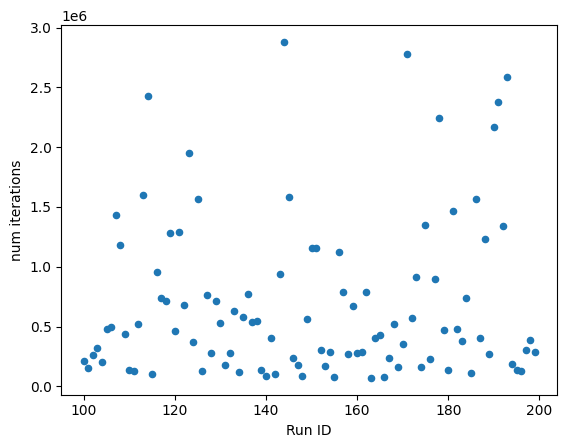

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_excel('num_iterations_it_takes.xlsx')

# print(df.to_string())

# Assuming you have a DataFrame named df with columns 'x' and 'y'
df.plot(x='Run ID', y='num iterations', kind='scatter')  # Scatter plot

In [ ]:
# How many itereations before one cluster happends
from ParticleSystem import ParticleSystem
import pandas as pd

WORLD_WIDTH = 300 # 90 # 200 # 20
WORLD_HEIGHT = 300 # 90 # 200 # 20
DELTA = 0.001 # 0.001 # 0.01 # 0.1 # probability to change direction
MU = 0.5 # density
EPSILON = 0.99 # probability to just follow the nomral direction for one iteration (and not randomly move)
ALPHA = 0.99 # probability to be an active (normal) particle
DOT_SIZE = 2 # 10 # 4
MIDDLE_CLUSTER_SIZE = -1 # 10
NUM_ITERATIONS =  100000000000000000000 # None # 10000
INIT_REFRESH_RATE = 10 # 100
INIT_PAUSED_STATUS = True

df = pd.DataFrame(columns=["Run ID", "num iterations"])

for i in range(100):

    world = ParticleSystem(
        WORLD_WIDTH,
        WORLD_HEIGHT,
        DELTA,
        MU,
        EPSILON, 
        ALPHA,
        DOT_SIZE,
        MIDDLE_CLUSTER_SIZE,
        NUM_ITERATIONS,
        INIT_REFRESH_RATE,
        INIT_PAUSED_STATUS
    )

    num_iterations_it_took = world.run_simulation_get_iteration_of_first_single_cluster()
    df.loc[len(df)] = [world.id, num_iterations_it_took] # adds to the df

    print(f'finished iteration: {i}')


# UNCOMMENT TO SAVE RESULTS, BEWARE OF OVERWRITING
df.to_excel(f'M{MU}D{DELTA}E{EPSILON}A{ALPHA}_{WORLD_WIDTH}x{WORLD_HEIGHT}_first_cluster.xlsx')

pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

: 

In [2]:
new_df = pd.read_excel('num_iterations_it_takes.xlsx')
print(new_df.to_string())

    Unnamed: 0  Run ID  num iterations
0            0      71        209999.0
1            1      72             NaN
2            2      73             NaN
3            3      74             NaN
4            4      75             NaN
5            5      76             NaN
6            6      77             NaN
7            7      78             NaN
8            8      79             NaN
9            9      80             NaN
10          10      81             NaN
11          11      82             NaN
12          12      83             NaN
13          13      84             NaN
14          14      85             NaN
15          15      86             NaN
16          16      87             NaN
17          17      88             NaN
18          18      89             NaN
19          19      90             NaN


In [ ]:
# weird stuff, how come we have more clusters that expected, some are only separated by one, and a million duplicates
# and it takes more time now, but we have significantly less than before (\|.>)

# write stats functions that take in the board, and go from there

In [20]:
def read_and_increment_run_id(self, line_number):
    assert line_number == 2, 'This is for 2D Particle Systems !'

    file_path = "run_ids.txt"

    with open(file_path, "r") as file:
        lines = file.readlines()

    # Extract the first number from the specified line
    first_part = lines[line_number - 1].split()[0]  # Extracts '00000001'
    new_id = int(first_part) + 1  # Increment by 1

    # Format it back to match the original 8-digit format
    new_id_str = f"{new_id:08d}"  

    # Replace the first number in the line while keeping the rest unchanged
    lines[line_number - 1] = new_id_str + "   " + " ".join(lines[line_number - 1].split()[1:]) + "\n"

    # Write the updated content back to the file
    with open(file_path, "w") as file:
        file.writelines(lines)

    return first_part

a = read_and_increment_run_id(None,2)
print(a)

00000013


In [5]:
file_path = "run_ids.txt"
line_number = 2

with open(file_path, "r") as file:
    lines = file.readlines()

# Extract the first number from the specified line
first_part = lines[line_number - 1].split()[0]  # Extracts '00000001'
new_id = int(first_part) + 1  # Increment by 1

# Format it back to match the original 8-digit format
new_id_str = f"{new_id:08d}"  

# Replace the first number in the line while keeping the rest unchanged
lines[line_number - 1] = new_id_str + "   " + " ".join(lines[line_number - 1].split()[1:]) + "\n"


#####################
#### THIS WORKS #####
#####################

# Write the updated content back to the file
with open(file_path, "w") as file:
    file.writelines(lines)

In [7]:
def read_and_increment_run_id(self, file_path):

    line_number = 2

    with open(file_path, "r") as file: # Read the file contents
        lines = file.readlines()
    
    first_part = lines[line_number - 1].split()[0]  # Extracts '00000001'
    new_id = int(first_part) + 1  # Increment by 1

    # Format it back to match the original 8-digit format
    new_id_str = f"{new_id}"  

    # Replace the first number in the line while keeping the rest unchanged
    lines[line_number - 1] = new_id_str + "   " + " ".join(lines[line_number - 1].split()[1:]) + "\n"

    # Write the updated content back to the file
    with open(file_path, "w") as file:
        file.writelines(lines)
    
    return new_id

# Example usage
file_path = "run_ids.txt"
updated_id = read_and_increment_run_id(file_path, 1)  # Increment the first line
print(f"Updated Run ID: {updated_id}")


ValueError: IPython won't let you open fd=1 by default as it is likely to crash IPython. If you know what you are doing, you can use builtins' open.

In [11]:
import numpy as np

# Fix these ranges, not all is interesting everywhere
mus = np.arange(0, 0.7, 0.1)  
deltas = np.array([0.01, 0.001, 0.0001, 0.00001])
epsilons = np.arange(0.7, 1.1, 0.1)  
alphas = np.arange(0.1, 1.1, 0.1)


print(f'Mus: {mus}')
print(f'Deltas: {deltas}')
print(f'Epsilons: {epsilons}')
print(f'Alphas: {alphas}')

# for mu in mus:
#     for delta in deltas:
#         for epsilon in epsilons:
#             for alpha in alphas:

#                 # Check for time T where the system's clusteredness is stationary
#                 print('hi')

print(f'num iterations: {len(mus)*len(deltas)*len(epsilons)*len(alphas)}')


Mus: [0.  0.1 0.2 0.3 0.4 0.5 0.6]
Deltas: [1.e-02 1.e-03 1.e-04 1.e-05]
Epsilons: [0.7 0.8 0.9 1.  1.1]
Alphas: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
num iterations: 1400


In [6]:
# so maybe in a first instance we just vary mu, see how the plots come then vary other parameters
# the plot of the data will be mu on the x axis and T on the y axis where T is the time where the system becomes 'converged'
import numpy as np
from ParticleSystem import ParticleSystem
import pandas as pd 

mus = np.arange(0, 0.7, 0.1)  
delta = 0.0001
epsilon = 0.9
alpha = 0.8

results = []

for mu in mus:
    world = ParticleSystem(
        300, # width
        300, # height
        delta,
        mu,
        epsilon, 
        alpha,
        3, # dot_size
        -1, # middle cluster size
        1000000000000000000000000000, # num iterations
        150, # init refresh rate
        False # init paused status
    )

    T = world.run_simulation()

    results.append({'mu': mu, 'T': T})
    print(f'Done for mu = {mu}, T = {T}')

results_df = pd.DataFrame(results)

results_df.to_csv('latest_latest_run.csv')
    
              

IndexError: Cannot choose from an empty sequence

In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('latest_run_cluster_records.csv')
# print(df.head())

fig = px.line(df, x='Iteration', y='Cluster Cardinality', title='Cluster Cardinality over Time')
# fig.update_layout()
fig.show()